<a href="https://colab.research.google.com/github/daKeshra7/arrest_dataset/blob/main/arrest_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Arrests for Marijuana Possession**
**Description:**
Data on police treatment of individuals arrested in Toronto for simple possession of small quantities of marijuana. The data are part of a larger data set featured in a series of articles in the Toronto Star newspaper.

In [2]:
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = "https://drive.google.com/file/d/1PSRI7NimvPpdNn4k38H1678IeSxb97aK/view?usp=drive_link"
file_id = "https://drive.google.com/uc?id=" + url.split('/')[-2]
arrests = pd.read_csv(file_id)

In [4]:
arrests.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [5]:
#Checking statistical description of the data
arrests.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5226.0,2613.500000,1508.760584,1.0,1307.25,2613.5,3919.75,5226.0
year,5226.0,1999.509376,1.390056,1997.0,1998.00,2000.0,2001.00,2002.0
age,5226.0,23.846537,8.316133,12.0,18.00,21.0,27.00,66.0
checks,5226.0,1.636433,1.539230,0.0,0.00,1.0,3.00,6.0


## **Data Cleaning**

Drop column name "Unnamed: 0"

In [6]:
arrests.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
arrests.head(2)

,released,colour,year,age,sex,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,3
1,No,Black,1999,17,Male,Yes,Yes,3


Renaming sex and colour column to gender and race respectively

In [8]:
#renaming the colour and sex column
arrests = arrests.rename(columns={'sex': 'gender', 'colour': 'race'})

Checking the data for null values

In [9]:
arrests.isna().sum()
#After careful observation of the data, it has been confirmed that there are no null values in the dataset.

released    0
race        0
year        0
age         0
gender      0
employed    0
citizen     0
checks      0
dtype: int64

> Replacing checks column numeric values with string values

In [10]:
#renaming values in the check column
arrests['checks'].replace({ 0 : "Arrests records", 1 : "Conviction records", 2: "Parole status", 3: "Warrant status", 4: "Fingerprints",
5: "Dna", 6: "Driver\'s Licence"}, inplace=True)

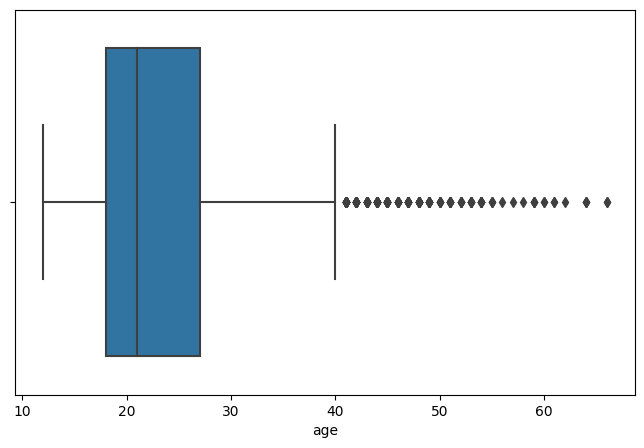

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=arrests, x='age')
plt.show()

The bloxplot denotes that the ages above 40 are outliers in the data set. Since they are less often arrested compare to the younger ones. The outliers will be removed from the dataset.

In [12]:

#Creating a new dataset named arrest_data
arrest_data = arrests[arrests['age'] <= 40]
arrest_data.head()

,released,race,year,age,gender,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,Warrant status
1,No,Black,1999,17,Male,Yes,Yes,Warrant status
2,Yes,White,2000,24,Male,Yes,Yes,Warrant status
4,Yes,Black,1999,27,Female,Yes,Yes,Conviction records
5,Yes,Black,1998,16,Female,Yes,Yes,Arrests records


In [13]:
#View the shape of the new data
arrest_data.shape

(4933, 8)

In [14]:
#view the general info about the data
arrest_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4933 entries, 0 to 5225
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   released  4933 non-null   object
 1   race      4933 non-null   object
 2   year      4933 non-null   int64 
 3   age       4933 non-null   int64 
 4   gender    4933 non-null   object
 5   employed  4933 non-null   object
 6   citizen   4933 non-null   object
 7   checks    4933 non-null   object
dtypes: int64(2), object(6)
memory usage: 346.9+ KB


The new data set will be used to carry out our analysis.

Data has been cleaned and we can proceed with our analysis

# **Data Analysis and Visualisation**


### **Arrestee's dataset Documentation**

A data frame with 4993 observations on the following 8 variables.

> **released:**
Whether or not the arrestee was released with a summons; a factor with levels: No; Yes.

> **race**
The arrestee's race; a factor with levels: Black; White.

> **year**
1997 through 2002; a numeric vector.

> **age**
in years; a numeric vector.

> **gender**
a factor with levels: Female; Male.

> **employed**
a factor with levels: No; Yes.

> **citizen**
a factor with levels: No; Yes.

> **checks**
Number of police data bases (of previous arrests, previous convictions, parole status, etc. – 6 in all) on which the arrestee's name appeared; a numeric vector

### **What year has the highest and lowest number of arrests?**

In [15]:
#Arrest data by year
arrest_data.year.value_counts()

2000    1201
2001    1137
1999    1040
1998     836
1997     455
2002     264
Name: year, dtype: int64

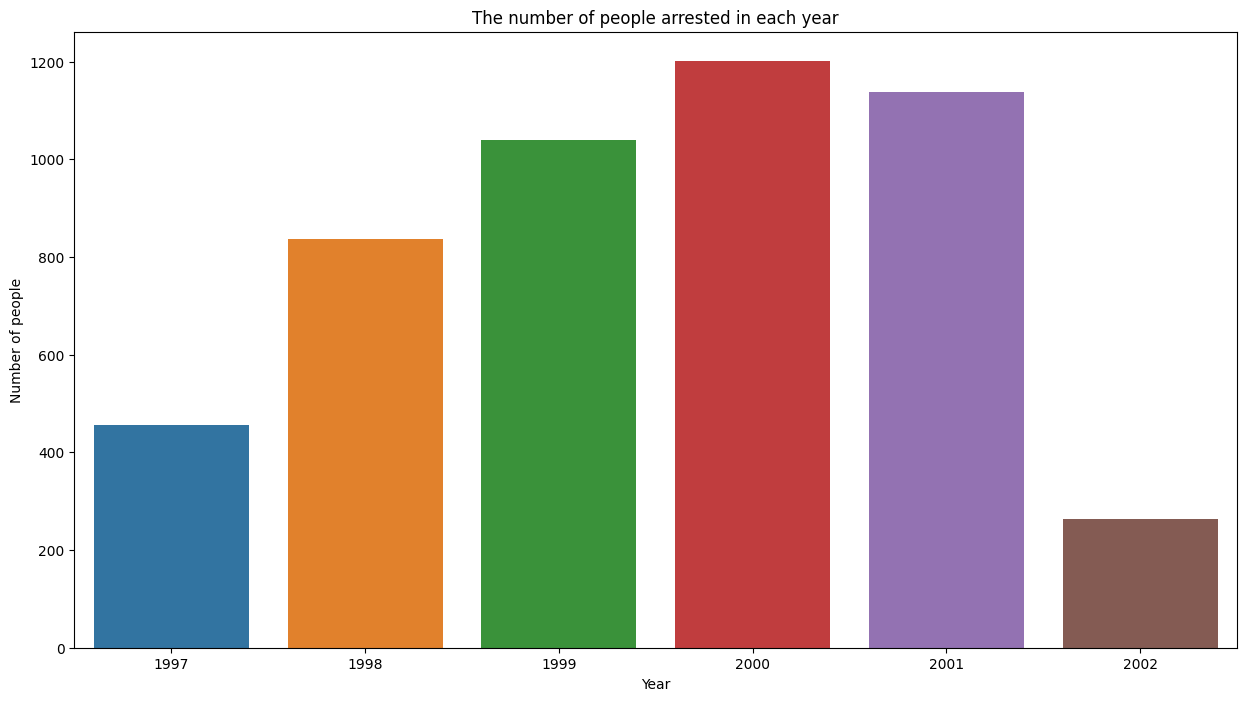

In [16]:
#Countplot for the number of people arrested each year

#set the size of the plot
plt.figure(figsize=(15,8))

#Plotting the data using seaborn
sns.countplot(data=arrest_data, x="year")

#setting the x and y label for the plot
plt.xlabel('Year')
plt.ylabel('Number of people')

#setting the plot title
plt.title('The number of people arrested in each year')

#displaying the plot
plt.show()

> **Which gender was arrested the most in each year?**

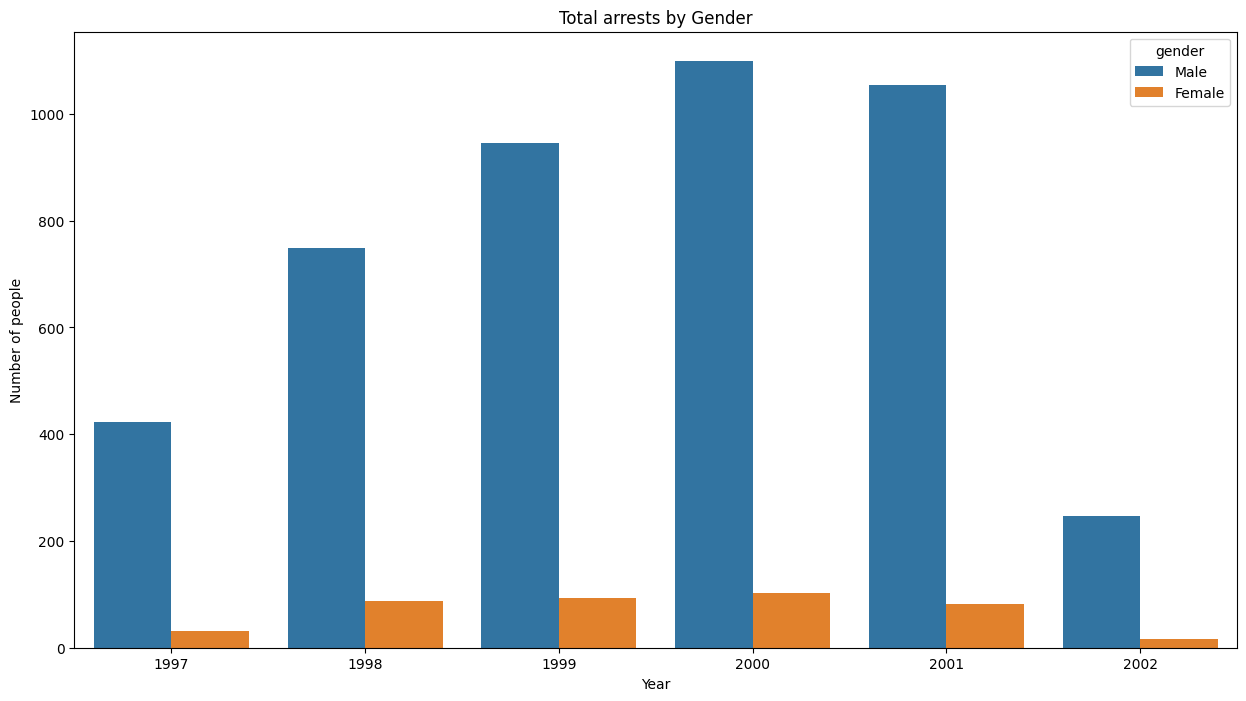

In [17]:
#Plotting the Year of the highest arrest by Year and Gender

#setting the chart size
plt.figure(figsize=(15,8))

#Plotting the data using seaborn
sns.countplot(data=arrest_data , x='year', hue='gender')

#setting the x and y label for the plot
plt.xlabel('Year')
plt.ylabel('Number of people')

#setting the plot title
plt.title('Total arrests by Gender')

#displaying the plot
plt.show()

It can be observed in the above plot that the arrest reduced by a wide margin in 2002 despite its yearly increase for both genders.

## **Arrestee's by age**

**Age range of people arrested**

In [ ]:
#Age range of arrested people

#setting the chart size
plt.figure(figsize=(15,8))

#Plotting the data using seaborn
sns.countplot(data=arrest_data, x="age")

#setting the plot title
plt.title('Number of people arrested by age')

#setting the x and y label for the plot
plt.xlabel('Age')
plt.ylabel('Number of people arrested')

#setting the chart size
plt.show()

**Checking the people arrested by their age and employment status**

In [ ]:
#Arrestees based on their age and employment status..
#setting the chart size
plt.figure(figsize=(15,8))

#Plotting the data using seaborn
sns.countplot(data=arrest_data, x="age", hue='employed')

#setting the plot title
plt.title('Number of people arrested by age and employment status')

#setting the x and y label for the plot
plt.xlabel('Age')
plt.ylabel('Number of people arrested')

#show the plot
plt.show()

An observation made from this plot is that, as the age increases, the arrest rate reduces. We could say age is a contributing factor to the arrests or we could say that there is an age range that takes more interest in possesing  Marijuana toget arrested.




.

**Arrestee's by Age and Gender**

In [ ]:
#Arrestees by age and gender
#setting the chart size
plt.figure(figsize=(15,8))

#Plotting the data using seaborn
sns.countplot(data=arrest_data, x='age', hue='gender')

#setting the plot title
plt.title('Total number of Arrestee\'s by Age and Gender', fontsize=18, weight="bold")

#setting the x and y label for the plot
plt.xlabel('Age',fontsize=10, weight="bold")
plt.ylabel('Number of people', fontsize=10, weight="bold")

#show the plot
plt.show()

**Checking the people arrested by their Age and Race**

In [ ]:
#Also checking out the arrestee by race and gender
#setting the chart size
plt.figure(figsize=(15,8))

#Plotting the data using seaborn
sns.countplot(data=arrest_data , x='age', hue='race')

#setting the x and y label for the plot
plt.xlabel('Race')
plt.ylabel('Numbers')

#setting the plot title
plt.title('Total arrested by Age and Race')

#show the plot
plt.show()

**Arrestee's released by Age**

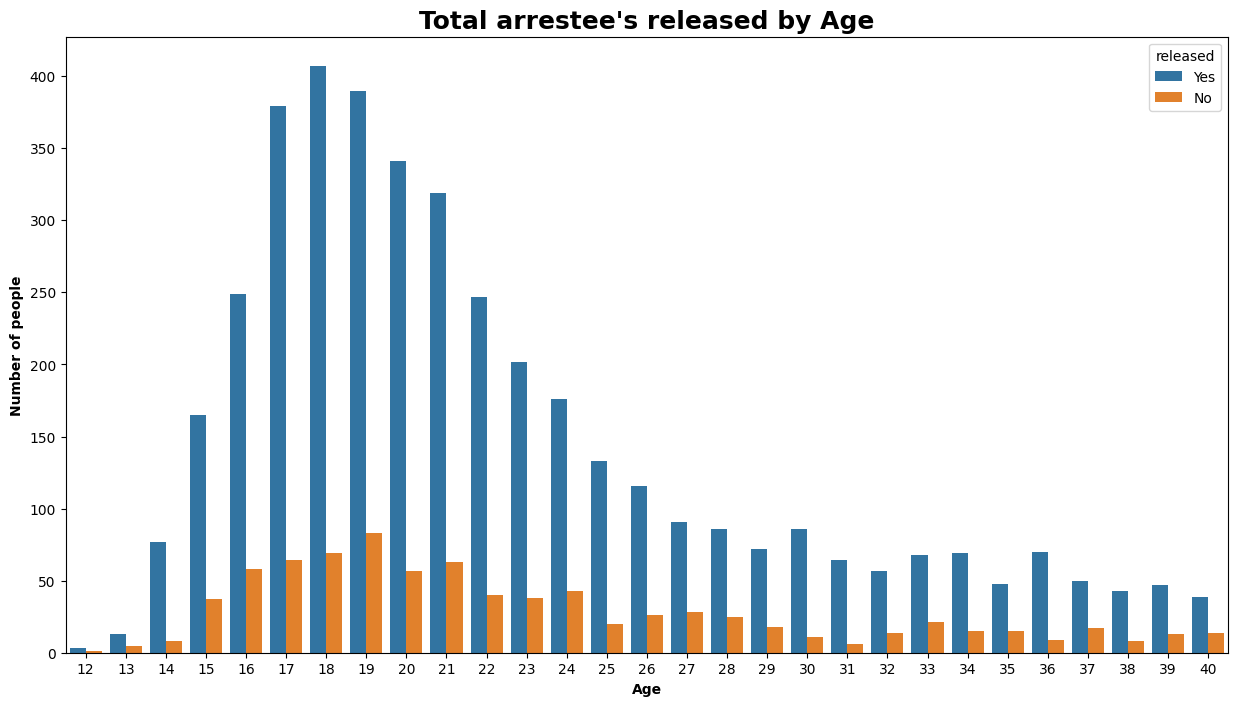

In [22]:
#Also checking out the arrestee's released by age
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data , x='age', hue='released')
plt.xlabel('Age', fontsize=10,weight='bold')
plt.ylabel('Number of people', fontsize=10,weight='bold')
plt.title('Total arrestee\'s released by Age', fontsize=18, weight='bold')
plt.show()

### **Data based on employed arrestees**

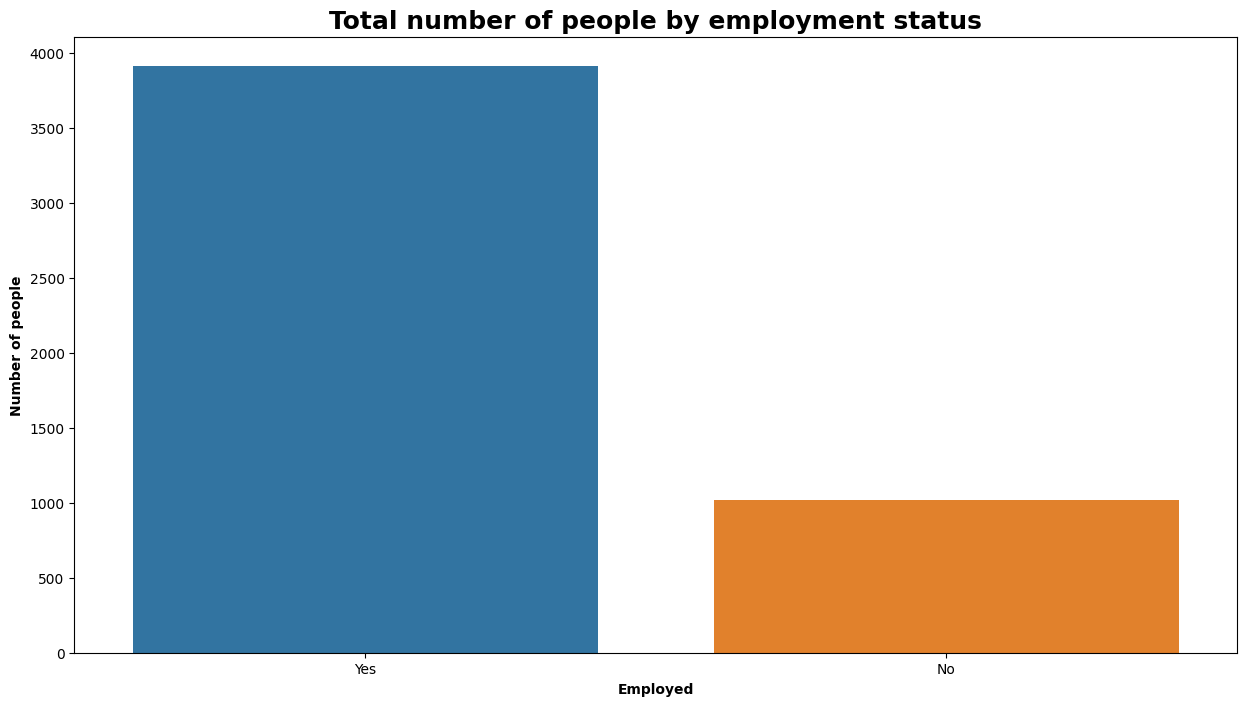

In [23]:
#Plotting a barchart for all arrestee's by their employment category
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data,  x='employed')
plt.title('Total number of people by employment status', fontsize=18, weight="bold")
plt.xlabel("Employed", fontsize=10, weight="bold")
plt.ylabel('Number of people', fontsize=10, weight="bold")
plt.show()
# arrest_data.employed.value_counts().plot(kind='bar')

> ### **How many employed arrestees were released?**

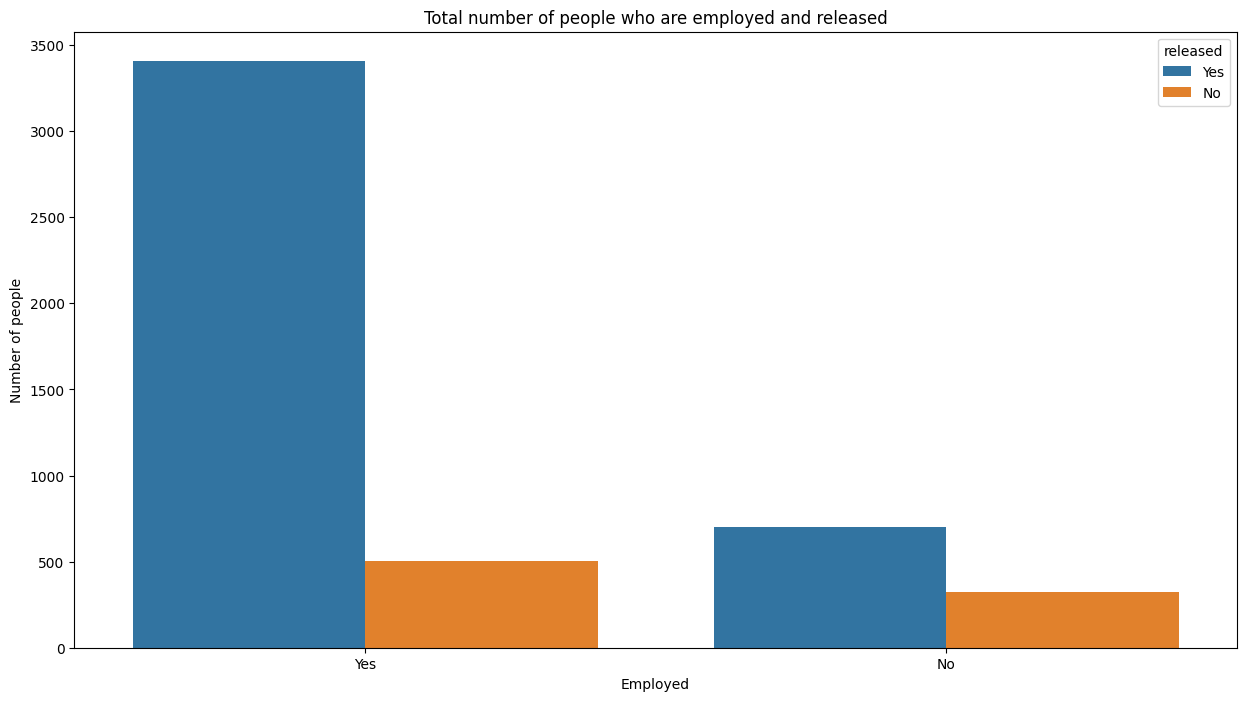

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data,  x='employed', hue='released')
plt.title('Total number of people who are employed and released')
plt.xlabel("Employed")
plt.ylabel('Number of people')
plt.show()

> ### **Checking the employed arrested by citizenship**

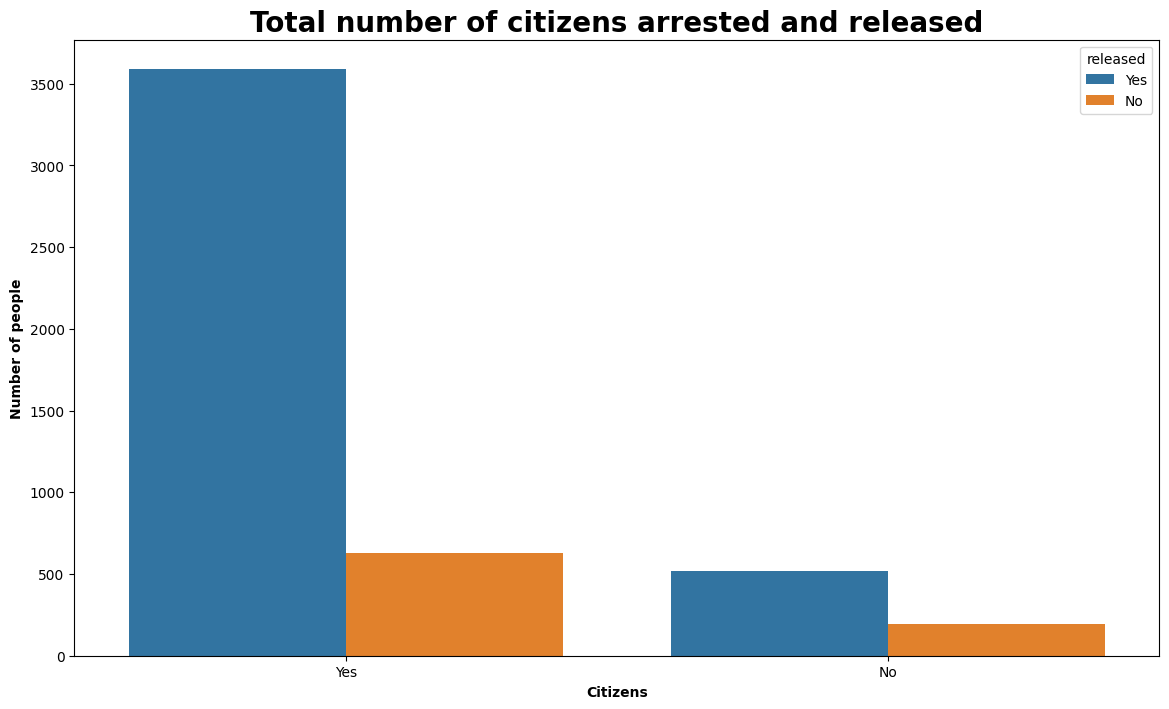

In [25]:
#Plottting chart for citizens arrest
plt.figure(figsize=(14,8))
sns.countplot(data=arrest_data,  x='citizen', hue='released')
plt.title('Total number of citizens arrested and released', fontsize=20, weight="bold")
plt.xlabel("Citizens", fontsize=10, weight="bold")
plt.ylabel('Number of people',fontsize=10, weight="bold")
plt.show()

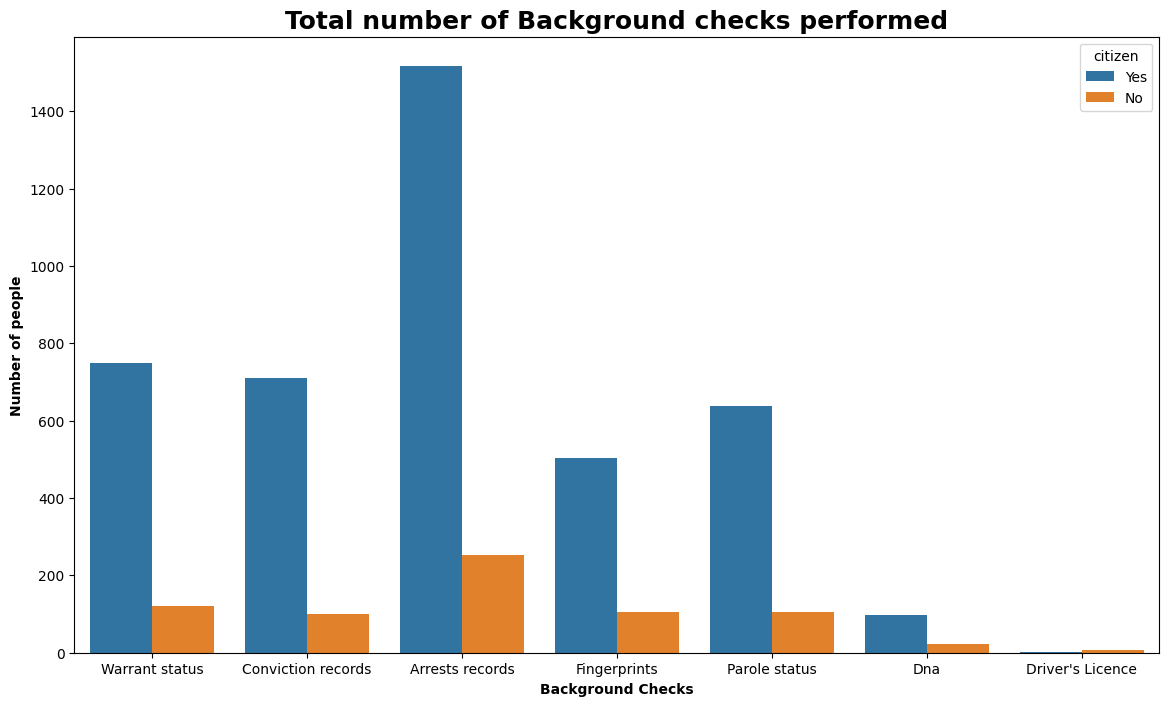

In [26]:
#Plottting chart for citizens arrest
plt.figure(figsize=(14,8))
sns.countplot(data=arrest_data,  x='checks', hue='citizen')
plt.title('Total number of Background checks performed', fontsize=18, weight='bold')
plt.xlabel("Background Checks", fontsize=10, weight="bold")
plt.ylabel('Number of people', weight="bold")
plt.show()

### **Arrestees by Race**

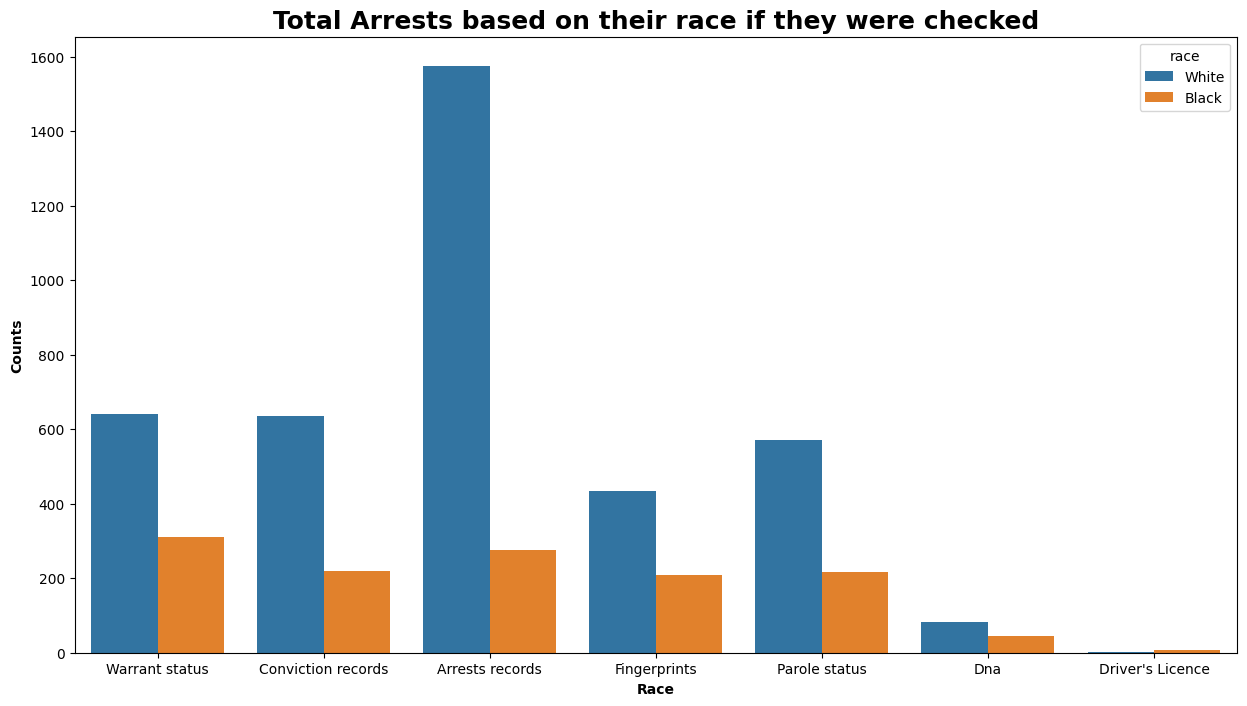

In [27]:
#Plotting to see how much checks was carried out before arrests
#Plotting chart based on employment of both gender
plt.figure(figsize=(15,8))
sns.countplot(data=arrests, x='checks', hue='race')
plt.xlabel('Race', fontsize=10, weight='bold')
plt.ylabel('Counts', fontsize=10, weight='bold')
plt.title('Total Arrests based on their race if they were checked', fontsize=18, weight='bold')
plt.show()

> Taking a look at the employment status and checks

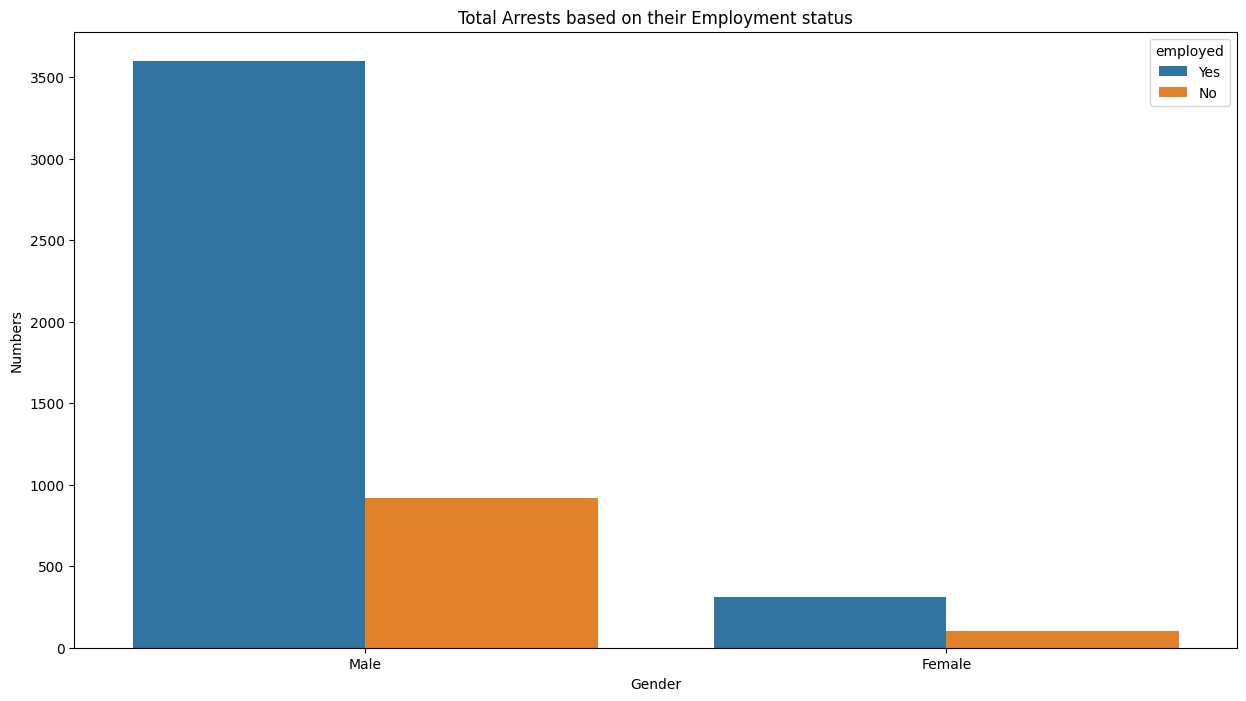

In [28]:
#Plotting chart based on employment of both gender
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data, x='gender', hue="employed")
plt.xlabel('Gender')
plt.ylabel('Numbers')
plt.title('Total Arrests based on their Employment status')
plt.show()

## **Arrestee's by gender and employed based on checks made.**

In [ ]:
#Plotting chart based on employment of both gender
#setting chart size
plt.figure(figsize=(15,8))

#plotting the chart
sns.countplot(data=arrest_data, x='checks', hue='gender')

#setting the x and y label
plt.xlabel('Database check performed')
plt.ylabel('Number of people arrested')

#setting the title of the plot
plt.title('Total Arrests based on database checks and gender')

#setting the position of the legend
plt.legend(loc='upper right')

#display the plot
plt.show()

The above chart shows that men were checked way more than women and the highest number of arrested arrestee's had previous arrest record.






.

## **Arrestee's by employment status**





In [ ]:
#Plotting chart based on employment of both gender
#setting chart size
plt.figure(figsize=(15,8))

#plotting the chart
sns.countplot(data=arrests, x='employed', hue='gender')

#setting the x and y label
plt.xlabel('Employed', fontsize=10, weight='bold')
plt.ylabel('Number of people', fontsize=10, weight='bold')

#setting the title of the plot
plt.title("Total Aresstee's based on their Employment status and gender", fontsize=18, weight='bold')

#display the plot
plt.show()

More employed people tend to be arrested in for both genders. This could mean that their employment capacity gives them the a purchasing power.

**Employed and released**

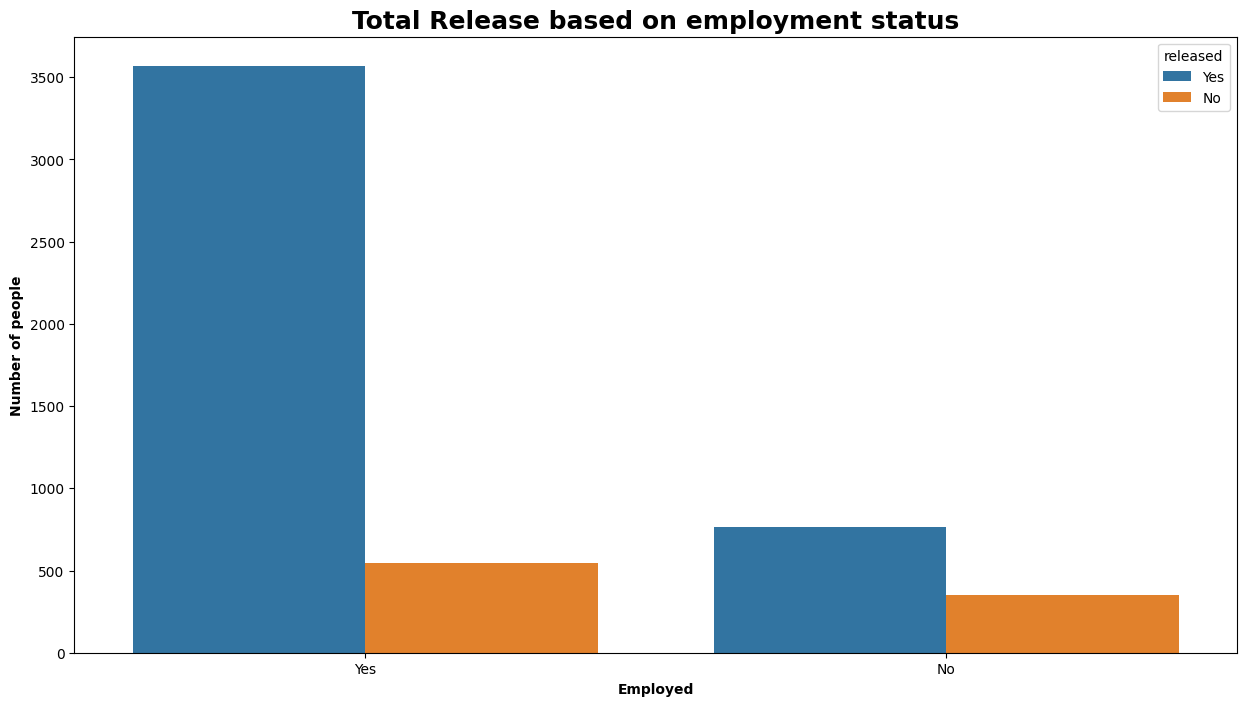

In [43]:
#Plotting chart based on employment of both gender and their release
#setting chart size
plt.figure(figsize=(15,8))

#plotting the chart
sns.countplot(data=arrests, x='employed', hue='released')

#setting the x and y label
plt.xlabel('Employed', fontsize=10, weight='bold')
plt.ylabel('Number of people', fontsize=10, weight='bold')

#setting the title of the plot
plt.title('Total Release based on employment status', fontsize=18, weight='bold')

#display the plot
plt.show()

More employed people were released based on summons while a lower number of people were released for the unemployed category.







.

>



In [32]:
arrest_data.employed.value_counts()

Yes    3912
No     1021
Name: employed, dtype: int64

## **Arrestee's by background checks**

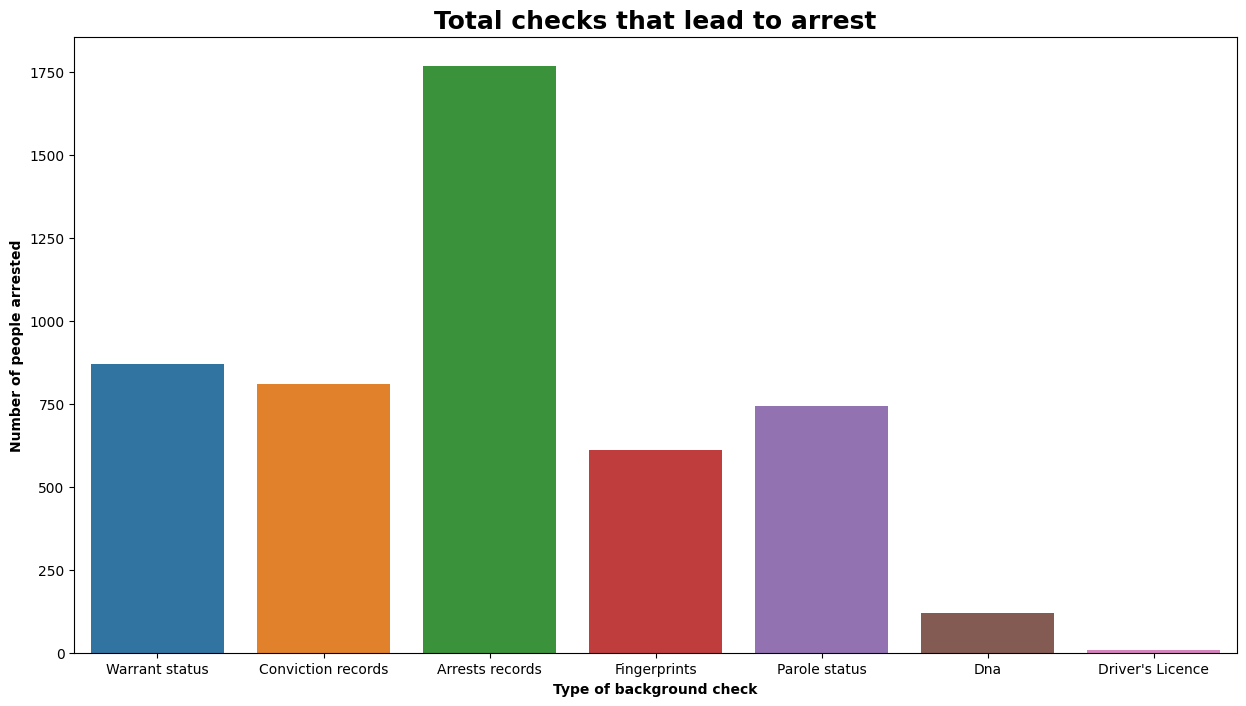

In [33]:
# also to confirm there arrests based on database checks
#Plotting chart based on background checks
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data, x='checks')
plt.xlabel('Type of background check', fontsize=10, weight='bold')
plt.ylabel('Number of people arrested', fontsize=10, weight='bold')
plt.title('Total checks that lead to arrest', fontsize=18, weight='bold' )
plt.show()

**arrestee's released after background check**

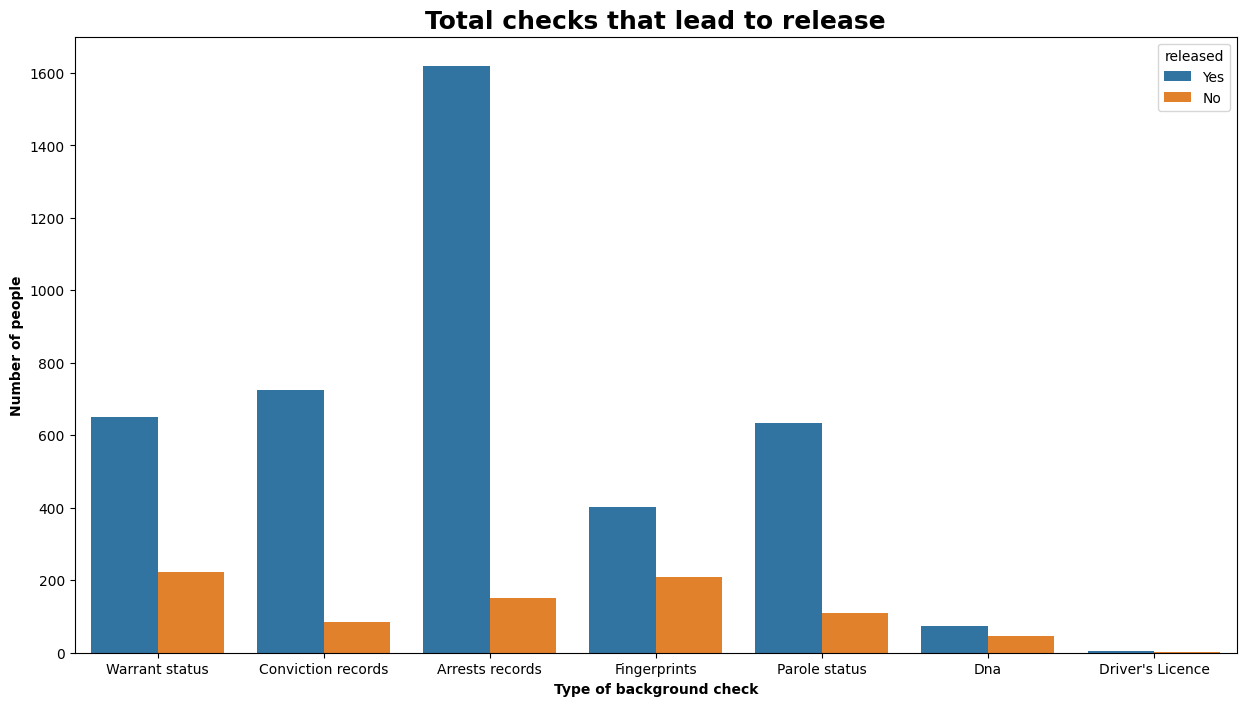

In [34]:
#Plotting chart for peple released after background checks
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data, x='checks', hue='released')
plt.xlabel('Type of background check', fontsize=10, weight='bold')
plt.ylabel('Number of people', fontsize=10, weight='bold')
plt.title('Total checks that lead to release', fontsize=18, weight='bold' )
plt.show()

A very high number were released after carrying out background record check. many people where released based on no arrest records, while conviction recoed and warrant status also played a role in arrestee's release.  

## **Arrestee's by race**

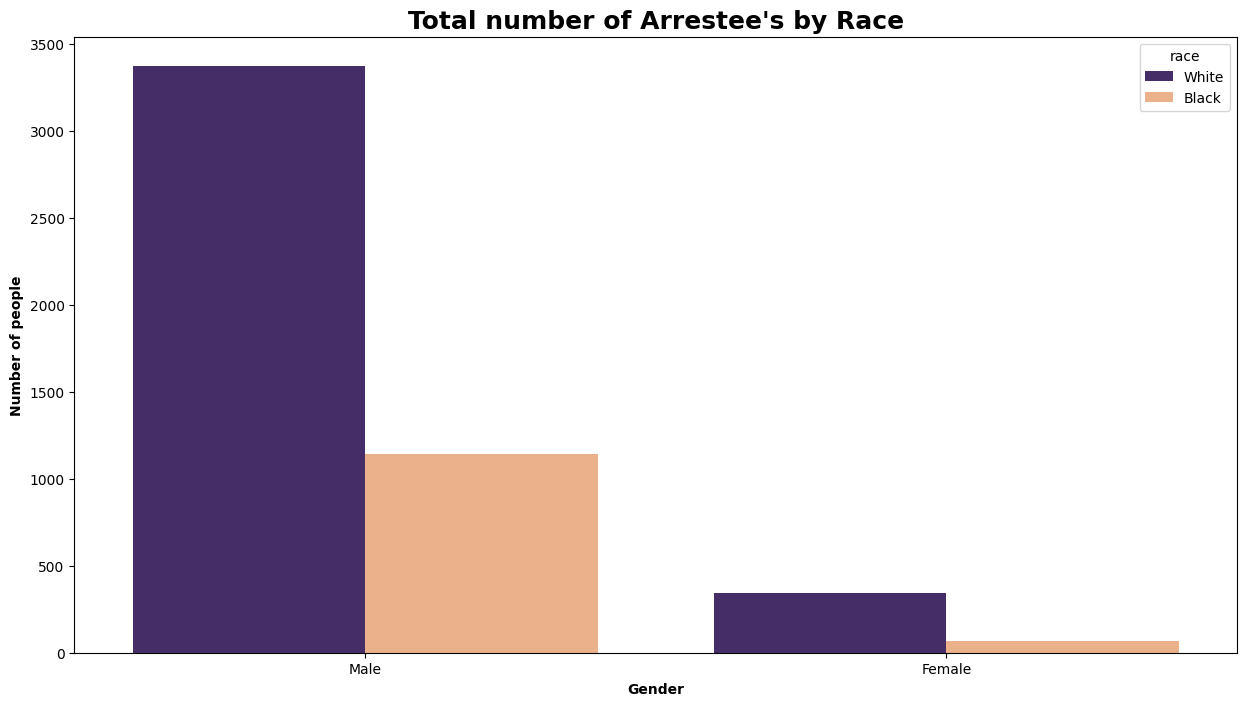

In [35]:
#Plotting forpeople arrested by race check
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data, x='gender', hue='race', palette=['#432371',"#FAAE7B"])
plt.title('Total number of Arrestee\'s by Race', fontsize=18, weight="bold")
plt.xlabel('Gender',fontsize=10, weight="bold")
plt.ylabel('Number of people', fontsize=10, weight="bold")
plt.show()

**Arrestee's released by race**

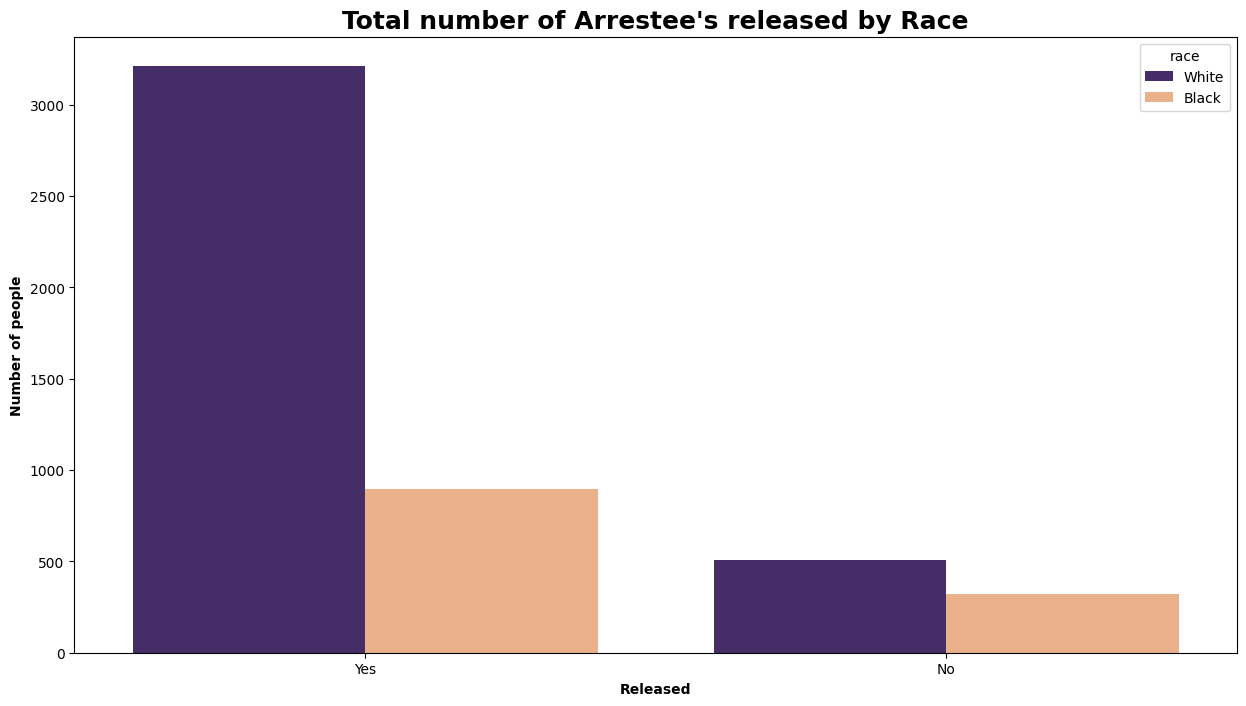

In [41]:
#Arrestee's released by race
plt.figure(figsize=(15,8))
sns.countplot(data=arrest_data, x='released', hue='race', palette=['#432371',"#FAAE7B"])
plt.title('Total number of Arrestee\'s released by Race', fontsize=18, weight="bold")
plt.xlabel('Released',fontsize=10, weight="bold")
plt.ylabel('Number of people', fontsize=10, weight="bold")
plt.show()

**Arrestee's released by age**

Females are checked less, which could also mean that there could be more Police officers than their female counterparts

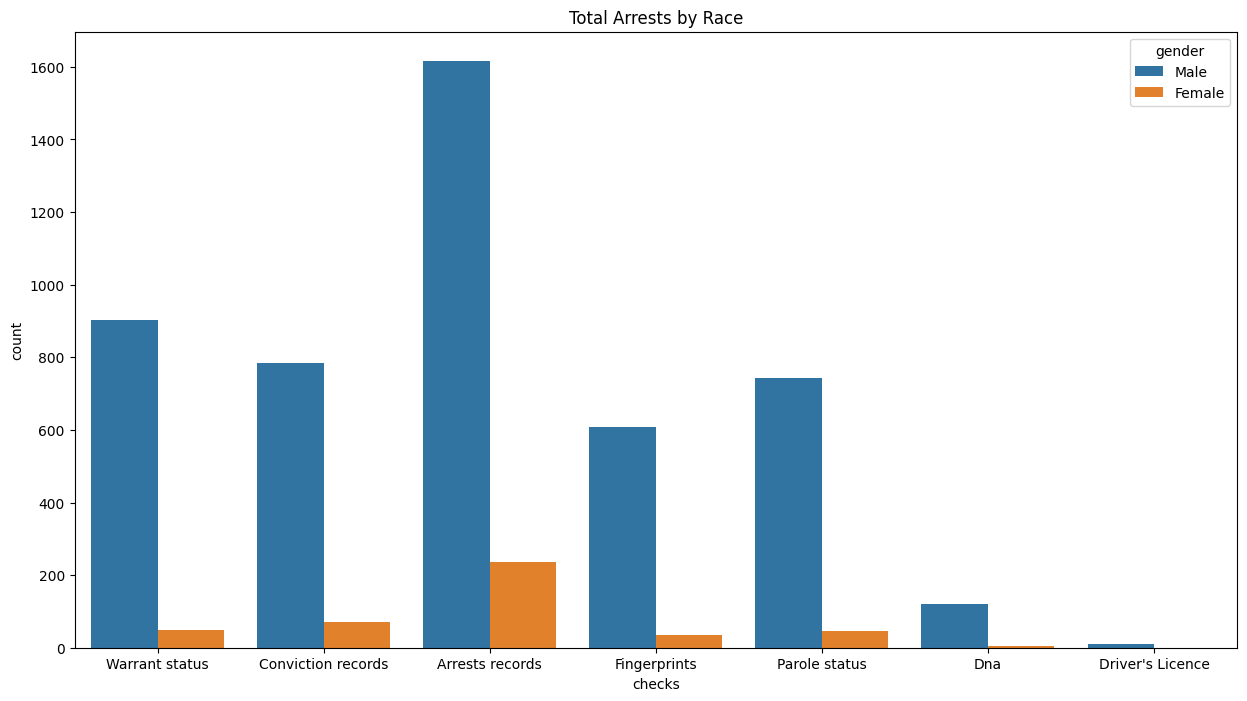

In [37]:
#checking arrests by gender
plt.figure(figsize=(15,8))
plt.title('Total Arrests by Race')
sns.countplot(data=arrests, x='checks', hue='gender')
plt.show()